# ___

# [ Machine Learning in Geosciences ]

**Department of Applied Geoinformatics and Carthography, Charles University** 

*Lukas Brodsky lukas.brodsky@natur.cuni.cz*



## Classifer model generalization exercises

Tasks: 

1. Test if the problem is linearly separabile, compare Logistic Regresion and Decision Trees.  

2. Evaluate when the Decision Tree starts overfitting with regard to the tree depth.  

3. Tune DT hyperparameters using cross-validation grid search technique; report the best hyperparametets and achieved accuracy. 

In [29]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
import matplotlib.pyplot as plt
np.random.seed(0)

### Sample data

In [4]:
X, y = make_classification(n_samples=10000, n_features=20,
                           n_informative=5, n_redundant=15, random_state=1)

In [5]:
X.shape

(10000, 20)

In [6]:
y.shape

(10000,)

In [7]:
# Classes
np.unique(y)

array([0, 1])

In [8]:
# Split traina nd test (50%) data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

### 1. Is the problem linearly separable? 
Test logistic regression model. 

In [12]:
# instantiate model
lr = LogisticRegression(random_state=42)

In [13]:
# fit model
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [14]:
# train accuracy
y_train_pred = lr.predict(X_train)
OA_train = accuracy_score(y_train, y_train_pred)
print(f"Train accuracy: {np.round(OA_train, 2) * 100} %")

Train accuracy: 85.0 %


In [16]:
y_test_pred = lr.predict(X_test)
OA_test = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy: {np.round(OA_test, 2) * 100} %")

Test accuracy: 86.0 %


### Decision Tree Classifier

In [18]:
# model
dt = DecisionTreeClassifier()

In [19]:
# fit 
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [21]:
# train accuracy
y_train_pred = dt.predict(X_train)
OA_train = accuracy_score(y_train, y_train_pred)
print(f"Train accuracy: {np.round(OA_train, 2) * 100} %")

Train accuracy: 100.0 %


In [23]:
# test accuracy
y_test_pred = dt.predict(X_test)
OA_test = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy: {np.round(OA_test, 2) * 100} %")

Test accuracy: 91.0 %


### 2. When the DT() model starts overfitting with regard to the depth of the tree? 

In [24]:
# When overfitting?
train_accuracy = []
test_accuracy = []

# Tree depth:  1 .. 20
for depth in range(1, 20):
    # model
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    # Evaluation
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    # Compare
    print(round(train_acc, 2), round(test_acc, 2))
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)


0.77 0.76
0.8 0.81
0.88 0.88
0.9 0.9
0.91 0.9
0.93 0.92
0.94 0.92
0.95 0.92
0.96 0.92
0.97 0.92
0.98 0.92
0.98 0.92
0.99 0.92
0.99 0.91
0.99 0.92
0.99 0.92
1.0 0.91
1.0 0.91
1.0 0.91


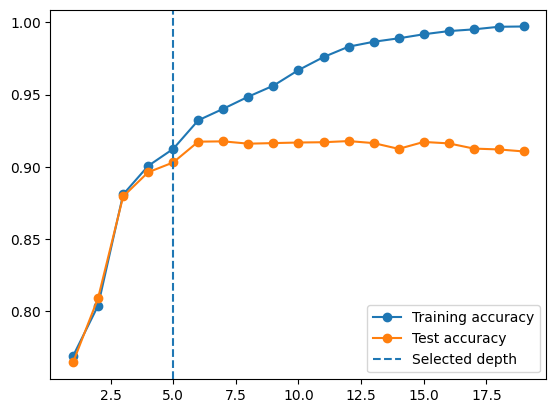

In [25]:
# Plot dependence of the model training and testing accuracy against the depth of the model.
plt.plot(range(1, 20), train_accuracy, '-o', label='Training accuracy')
plt.plot(range(1, 20), test_accuracy, '-o', label='Test accuracy')
plt.axvline(x = 5, linestyle='--', label='Selected depth')
plt.legend()

### 3. Finetune the DT model through cross-validation and grid search, report accuracy. 

In [27]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
dtc = DecisionTreeClassifier(random_state=42)

In [30]:
# Apply grid search of hyperparameters and cross-validation 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
hyperparameter_space = {'max_depth': [2,4,6,8,10,15,20,50,100],
                        'min_samples_leaf': [1,2,4,6,8,10,20,30]}

gs = GridSearchCV(dtc, param_grid=hyperparameter_space, n_jobs=2,
                  scoring="accuracy", cv=5, return_train_score=True)

In [31]:
# run fit (be aware: takes longer!)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=2,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 15, 20, 50, 100],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10, 20, 30]},
             return_train_score=True, scoring='accuracy')

In [34]:
# Optimal parameters and scores 
print("Optimal hyperparameter combination: ", gs.best_params_)
print("Mean cross-validated accuracy of the best_estimator: ", round(gs.best_score_ * 100, 2))

Optimal hyperparameter combination:  {'max_depth': 10, 'min_samples_leaf': 4}
Mean cross-validated accuracyof the best_estimator:  91.6


In [36]:
# Test accuracy
gs.best_estimator_.fit(X_train, y_train)
y_test_pred = gs.best_estimator_.predict(X_test)

acc_test = np.sqrt(accuracy_score(y_test, y_test_pred))
print("Test score: ", np.round(acc_test, 2) * 100)


Test score:  96.0
